<div class="alert alert-block alert-success">
<h1>Spatio-Temporal Gradient of Snow Depth</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>

1. [Load Matches for 2019, 2021, 2022](#section1)
1. [Calculating Spatio-Temporal Gradient of Snow Depth](#section2)
    1. [Year 2022](#section2.1)
    1. [Year 2021](#section2.2)
    1. [Year 2019](#section2.3)
1. [Plotting Spatio-Temporal Gradient of Snow Depth](#section3)

<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

In [2]:
plt.style.use("ggplot")

<div class="alert alert-info" role="alert">

## <a id="section1"></a>Load Matches for 2019, 2021, 2022
[Back to top](#TOC_TOP)

</div>

In [3]:
file = "matches_2019.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
ds["Timestamp"] = pd.to_datetime(ds["Timestamp"], errors="coerce")
matches_2019 = ds
matches_2019

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05


In [4]:
file = "matches_2021.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
ds["Timestamp"] = pd.to_datetime(ds["Timestamp"], errors="coerce")
matches_2021 = ds
matches_2021

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
1,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
2,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
3,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
4,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15
5,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26
6,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29
7,2021,6,7,-1050.0,1425.0,10.48421,71.395,114.635,-1048.022189,1433.452009,S55,-73.7144,-36.1712,-73.76549,-36.38435,2021-06-07
8,2021,6,11,-1050.0,1425.0,10.05532,71.263,114.504,-1050.751403,1436.711215,S55,-73.6760,-36.1802,-73.76549,-36.38435,2021-06-11
9,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14


In [5]:
file = "matches_2022.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
ds["Timestamp"] = pd.to_datetime(ds["Timestamp"], errors="coerce")
matches_2022 = ds
matches_2022

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2022,5,9,-2125.0,1550.0,31.55190,57.006,85.185,-2123.504008,1554.591203,S114,-66.0472,-53.7926,-66.06048,-53.89255,2022-05-09
1,2022,6,20,-2175.0,1775.0,19.63112,59.768,91.871,-2180.356674,1769.856225,S114,-64.4896,-50.9328,-64.49758,-50.78239,2022-06-20
2,2022,7,5,-2250.0,1900.0,17.19627,60.195,96.172,-2247.362213,1890.725799,S114,-63.3602,-49.9258,-63.29019,-49.82077,2022-07-05
3,2022,7,11,-2250.0,1925.0,26.62206,62.056,98.317,-2256.327665,1923.370288,S114,-63.1156,-49.5546,-63.14845,-49.45117,2022-07-11
4,2022,8,12,-2150.0,2150.0,7.42236,66.924,120.022,-2149.748670,2144.127995,S114,-62.4918,-45.0750,-62.45403,-45.00000,2022-08-12
5,2022,8,17,-2175.0,2150.0,10.31647,68.672,124.806,-2174.007433,2146.528541,S114,-62.3268,-45.3644,-62.29936,-45.33119,2022-08-17


<div class="alert alert-info" role="alert">

## <a id="section2"></a>Calculating Spatio-Temporal Gradient of Snow Depth
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section2.1"></a> Year 2022
[Back to top](#TOC_TOP)

</div>

In [6]:
STG_Buoy_2022 = [0]
for n in range(len(matches_2022["Snow_depth_buoy"]) - 1):
    Snow_Acc = matches_2022["Snow_depth_buoy"][n+1] - matches_2022["Snow_depth_buoy"][n]
    STG_Buoy_2022.append(Snow_Acc)
matches_2022["STG_Buoy"] = STG_Buoy_2022


STG_Sat_2022 = [0]
for n in range(len(matches_2022["Snow_depth_satellite"]) - 1):
    Snow_Acc = matches_2022["Snow_depth_satellite"][n+1] - matches_2022["Snow_depth_satellite"][n]
    STG_Sat_2022.append(Snow_Acc)
matches_2022["STG_Sat"] = STG_Sat_2022


matches_2022

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2022,5,9,-2125.0,1550.0,31.55190,57.006,85.185,-2123.504008,1554.591203,S114,-66.0472,-53.7926,-66.06048,-53.89255,2022-05-09,0.000,0.00000
1,2022,6,20,-2175.0,1775.0,19.63112,59.768,91.871,-2180.356674,1769.856225,S114,-64.4896,-50.9328,-64.49758,-50.78239,2022-06-20,2.762,-11.92078
2,2022,7,5,-2250.0,1900.0,17.19627,60.195,96.172,-2247.362213,1890.725799,S114,-63.3602,-49.9258,-63.29019,-49.82077,2022-07-05,0.427,-2.43485
3,2022,7,11,-2250.0,1925.0,26.62206,62.056,98.317,-2256.327665,1923.370288,S114,-63.1156,-49.5546,-63.14845,-49.45117,2022-07-11,1.861,9.42579
4,2022,8,12,-2150.0,2150.0,7.42236,66.924,120.022,-2149.748670,2144.127995,S114,-62.4918,-45.0750,-62.45403,-45.00000,2022-08-12,4.868,-19.19970
5,2022,8,17,-2175.0,2150.0,10.31647,68.672,124.806,-2174.007433,2146.528541,S114,-62.3268,-45.3644,-62.29936,-45.33119,2022-08-17,1.748,2.89411


<div class="alert alert-danger" role="alert">

### <a id="section2.2"></a> Year 2021
[Back to top](#TOC_TOP)

</div>

In [7]:
SensorS55 = matches_2021[matches_2021["Sensor_Number"] == "S55"]
SensorS55 = pd.DataFrame(SensorS55)

SensorS55 = SensorS55.reset_index(drop=True)


List_Accumulation_S55 = [0]
for n in range(len(SensorS55["Snow_depth_buoy"]) - 1):
    Snow_Acc = SensorS55["Snow_depth_buoy"][n+1] - SensorS55["Snow_depth_buoy"][n]
    List_Accumulation_S55.append(Snow_Acc)
SensorS55["STG_Buoy"] = List_Accumulation_S55


List_Accumulation_S55_sat = [0]
for n in range(len(SensorS55["Snow_depth_satellite"]) - 1):
    Snow_Acc = SensorS55["Snow_depth_satellite"][n+1] - SensorS55["Snow_depth_satellite"][n]
    List_Accumulation_S55_sat.append(Snow_Acc)
SensorS55["STG_Sat"] = List_Accumulation_S55_sat

SensorS55

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07,0.000,0.00000
1,2021,6,7,-1050.0,1425.0,10.48421,71.395,114.635,-1048.022189,1433.452009,S55,-73.7144,-36.1712,-73.76549,-36.38435,2021-06-07,0.129,-8.76701
2,2021,6,11,-1050.0,1425.0,10.05532,71.263,114.504,-1050.751403,1436.711215,S55,-73.6760,-36.1802,-73.76549,-36.38435,2021-06-11,-0.132,-0.42889
3,2021,6,15,-1075.0,1425.0,16.86000,72.071,112.5,-1076.001592,1417.538646,S55,-73.6786,-37.2008,-73.63021,-37.03039,2021-06-15,0.808,6.80468
4,2021,6,19,-1100.0,1425.0,13.12104,69.318,109.747,-1097.483459,1413.134810,S55,-73.5918,-37.8340,-73.49296,-37.66562,2021-06-19,-2.753,-3.73896
5,2021,7,1,-1125.0,1450.0,21.99351,69.915,110.344,-1131.296838,1441.459118,S55,-73.2016,-38.1258,-73.17574,-37.80653,2021-07-01,0.597,8.87247
6,2021,7,5,-1125.0,1425.0,31.11419,73.771,114.2,-1118.859018,1421.336308,S55,-73.4142,-38.2094,-73.35378,-38.29016,2021-07-05,3.856,9.12068


In [8]:
SensorS112 = matches_2021[matches_2021["Sensor_Number"] == "S112"]
SensorS112 = pd.DataFrame(SensorS112)

SensorS112 = SensorS112.reset_index(drop=True)


List_Accumulation_S112 = [0]
for n in range(len(SensorS112["Snow_depth_buoy"]) - 1):
    Snow_Acc = SensorS112["Snow_depth_buoy"][n+1] - SensorS112["Snow_depth_buoy"][n]
    List_Accumulation_S112.append(Snow_Acc)
SensorS112["STG_Buoy"] = List_Accumulation_S112


List_Accumulation_S112_sat = [0]
for n in range(len(SensorS112["Snow_depth_satellite"]) - 1):
    Snow_Acc = SensorS112["Snow_depth_satellite"][n+1] - SensorS112["Snow_depth_satellite"][n]
    List_Accumulation_S112_sat.append(Snow_Acc)
SensorS112["STG_Sat"] = List_Accumulation_S112_sat

SensorS112

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.451,-31.1084,-74.4588,-31.10881,2021-04-02,0.000,0.00000
1,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.505,-31.3976,-74.4588,-31.10881,2021-04-15,-4.091,1.76816


In [9]:
SensorS114 = matches_2021[matches_2021["Sensor_Number"] == "S114"]
SensorS114 = pd.DataFrame(SensorS114)

SensorS114 = SensorS114.reset_index(drop=True)


List_Accumulation_S114 = [0]
for n in range(len(SensorS114["Snow_depth_buoy"]) - 1):
    Snow_Acc = SensorS114["Snow_depth_buoy"][n+1] - SensorS114["Snow_depth_buoy"][n]
    List_Accumulation_S114.append(Snow_Acc)
SensorS114["STG_Buoy"] = List_Accumulation_S114


List_Accumulation_S114_sat = [0]
for n in range(len(SensorS114["Snow_depth_satellite"]) - 1):
    Snow_Acc = SensorS114["Snow_depth_satellite"][n+1] - SensorS114["Snow_depth_satellite"][n]
    List_Accumulation_S114_sat.append(Snow_Acc)
SensorS114["STG_Sat"] = List_Accumulation_S114_sat

SensorS114

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,0.000,0.00000
1,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,-0.164,1.53964
2,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26,0.235,4.22764
3,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29,3.351,4.09068
4,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14,-1.587,-2.08069
5,2021,7,9,-1200.0,1350.0,19.56157,62.345,NaN,-1204.630467,1349.143452,S114,-73.4160,-41.7612,-73.43808,-41.63354,2021-07-09,4.238,7.55004
6,2021,7,25,-1300.0,1400.0,15.78022,60.442,66.600,-1291.332347,1397.571922,S114,-72.5652,-42.7374,-72.49595,-42.87890,2021-07-25,-1.903,-3.78135
7,2021,9,12,-1475.0,1325.0,21.60654,63.586,72.815,-1483.265355,1325.270226,S114,-71.7874,-48.2198,-71.84449,-48.06649,2021-09-12,3.144,5.82632
8,2021,11,4,-1625.0,1275.0,28.56576,59.828,77.862,-1628.971037,1272.819861,S114,-71.0836,-51.9972,-71.09963,-51.88172,2021-11-04,-3.758,6.95922


In [10]:
matches_2021_STG = pd.concat([SensorS114, SensorS112, SensorS55])
matches_2021_STG = matches_2021_STG.reset_index(drop=True)
matches_2021_STG

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,0.000,0.00000
1,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,-0.164,1.53964
2,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26,0.235,4.22764
3,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29,3.351,4.09068
4,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14,-1.587,-2.08069
5,2021,7,9,-1200.0,1350.0,19.56157,62.345,NaN,-1204.630467,1349.143452,S114,-73.4160,-41.7612,-73.43808,-41.63354,2021-07-09,4.238,7.55004
6,2021,7,25,-1300.0,1400.0,15.78022,60.442,66.600,-1291.332347,1397.571922,S114,-72.5652,-42.7374,-72.49595,-42.87890,2021-07-25,-1.903,-3.78135
7,2021,9,12,-1475.0,1325.0,21.60654,63.586,72.815,-1483.265355,1325.270226,S114,-71.7874,-48.2198,-71.84449,-48.06649,2021-09-12,3.144,5.82632
8,2021,11,4,-1625.0,1275.0,28.56576,59.828,77.862,-1628.971037,1272.819861,S114,-71.0836,-51.9972,-71.09963,-51.88172,2021-11-04,-3.758,6.95922
9,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02,0.000,0.00000


<div class="alert alert-danger" role="alert">

### <a id="section2.3"></a> Year 2019
[Back to top](#TOC_TOP)

</div>

In [11]:
STG_Buoy_2019 = [0]
for n in range(len(matches_2019["Snow_depth_buoy"]) - 1):
    Snow_Acc = matches_2019["Snow_depth_buoy"][n+1] - matches_2019["Snow_depth_buoy"][n]
    STG_Buoy_2019.append(Snow_Acc)
matches_2019["STG_Buoy"] = STG_Buoy_2019


STG_Sat_2019 = [0]
for n in range(len(matches_2019["Snow_depth_satellite"]) - 1):
    Snow_Acc = matches_2019["Snow_depth_satellite"][n+1] - matches_2019["Snow_depth_satellite"][n]
    STG_Sat_2019.append(Snow_Acc)
matches_2019["STG_Sat"] = STG_Sat_2019

# Display the dataframe to check the results
matches_2019

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,0.000,0.00000
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,-0.638,11.90105
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,-0.571,6.15666
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,1.467,-4.76406
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,2.462,4.61197


## Get all years together

In [12]:
matches_2019["Timestamp"] = pd.to_datetime(matches_2019[["Year", "Month", "Day"]])
matches_2021_STG["Timestamp"] = pd.to_datetime(matches_2021_STG[["Year", "Month", "Day"]])
matches_2022["Timestamp"] = pd.to_datetime(matches_2022[["Year", "Month", "Day"]])

In [13]:
matches_all = pd.concat([matches_2019, matches_2021_STG, matches_2022])
matches_all = matches_all.reset_index(drop=True)
matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp,STG_Buoy,STG_Sat
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06,0.000,0.00000
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22,-0.638,11.90105
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23,-0.571,6.15666
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09,1.467,-4.76406
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05,2.462,4.61197
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01,0.000,0.00000
6,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06,-0.164,1.53964
7,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26,0.235,4.22764
8,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29,3.351,4.09068
9,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14,-1.587,-2.08069


<div class="alert alert-info" role="alert">

## <a id="section3"></a>Plotting Spatio-Temporal Gradient of Snow Depth
[Back to top](#TOC_TOP)

</div>

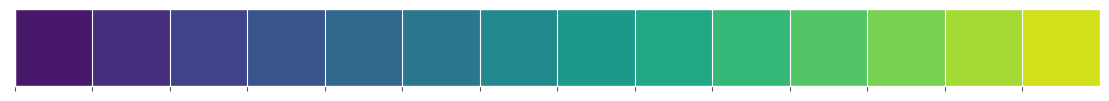

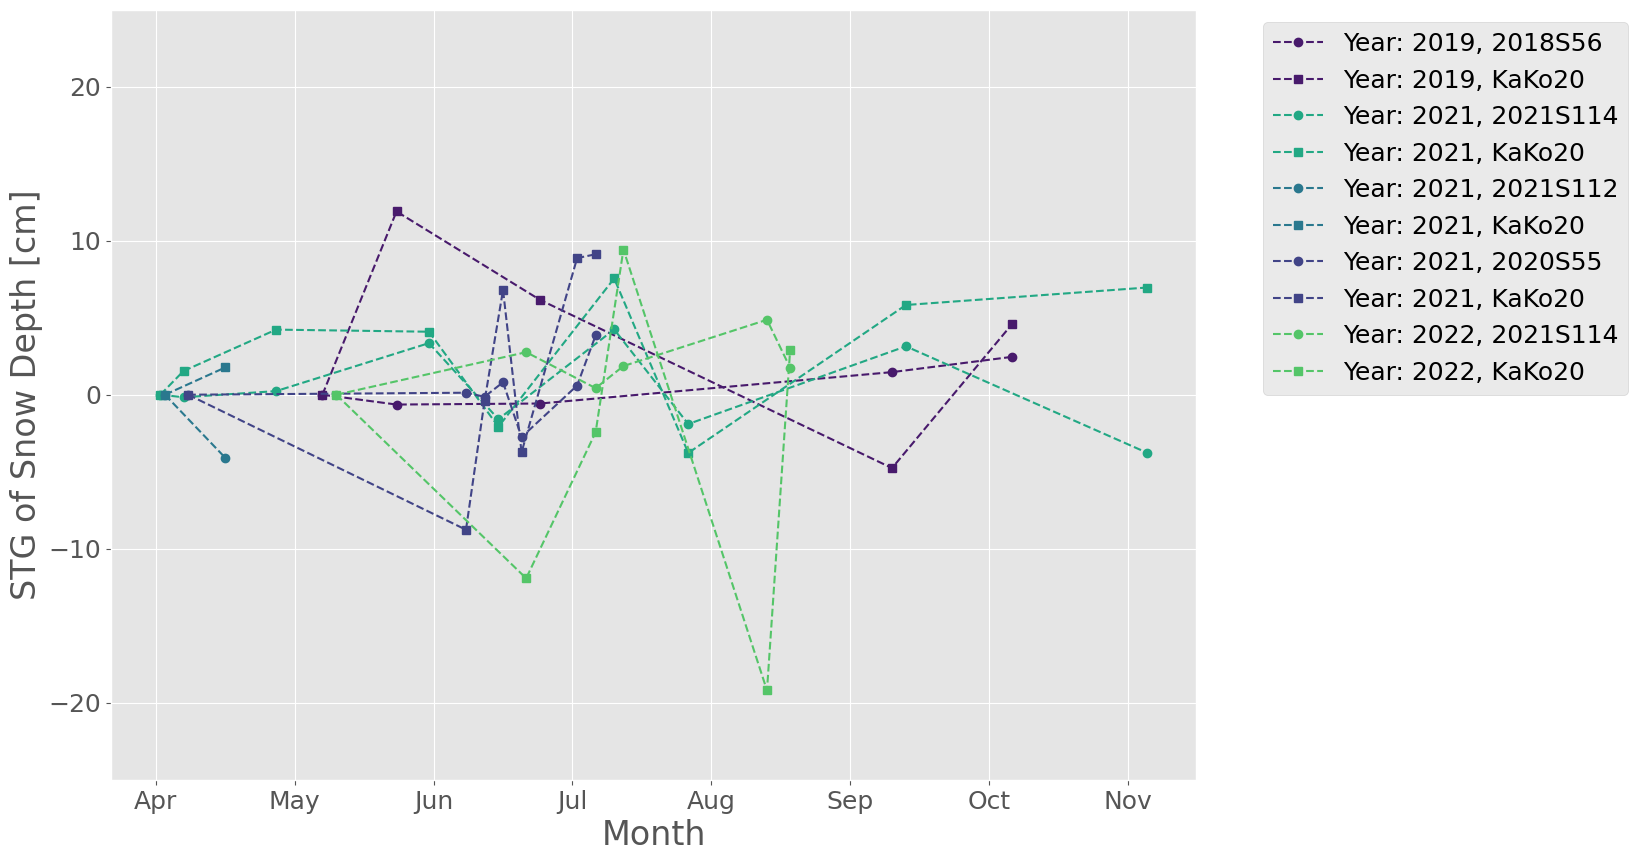

In [14]:
y_limits = (-25, 25)

# Define the custom color palette
custom_palette = sns.color_palette("viridis", 14)
sns.palplot(custom_palette)

# Define the mapping for old sensor numbers to new format
sensor_number_mapping = {
    "S119": "2022S119",
    "S56": "2018S56",
    "S55": "2020S55",
    "S114": "2021S114",
    "S112": "2021S112"
}

#Sensor_Number column in matches_all DataFrame
matches_all["Sensor_Number"] = matches_all["Sensor_Number"].map(sensor_number_mapping).fillna(matches_all["Sensor_Number"])

# Create a mapping from sensor number to specific colors from the custom palette
sensor_color_map = {
    "2022S119": custom_palette[13],
    "2018S56": custom_palette[0],
    "2020S55": custom_palette[2],
    "2021S114": custom_palette[8],
    "2021S112": custom_palette[5]
}

# Update the specific condition for "2021S114" in year 2022
special_condition_color = custom_palette[10]

# Create a new column "Month_Day" that combines month and day into a fractional month representation
matches_all["Month_Day"] = matches_all["Month"] + matches_all["Day"] / 30.0

# Create a new column combining "Sensor_Number" and "Year" for unique color assignment
matches_all["Sensor_Year"] = matches_all["Sensor_Number"].astype(str) + "_" + matches_all["Year"].astype(str)

# Create the plot
plt.figure(figsize=(14, 10))  

# Loop through each sensor-year combination and plot the data
sensor_years = matches_all["Sensor_Year"].unique()
for sensor_year in sensor_years:
    sensor_year_data = matches_all[matches_all["Sensor_Year"] == sensor_year]
    
    # Extract the year from the "Sensor_Year" column
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    # Determine the color based on the sensor number and special condition
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black")  
    
    # Plot buoy data with circles
    plt.plot(sensor_year_data["Month_Day"], sensor_year_data["STG_Buoy"], marker="o", linestyle="--", 
             label=f"Year: {year}, {sensor}", color=color)
    
    # Plot satellite data with squares
    plt.plot(sensor_year_data["Month_Day"], sensor_year_data["STG_Sat"], marker="s", linestyle="--", 
             label=f"Year: {year}, KaKo20", color=color)

# Set x-axis labels to be the month names with approximate positions
plt.xticks(ticks=[4 + i for i in range(8)], labels=["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])

plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)

plt.ylim(y_limits)

plt.xlabel("Month", fontsize=24)
plt.ylabel("STG of Snow Depth [cm]", fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18)
plt.grid(True)

plt.savefig("STG.png", bbox_inches="tight")

plt.show()


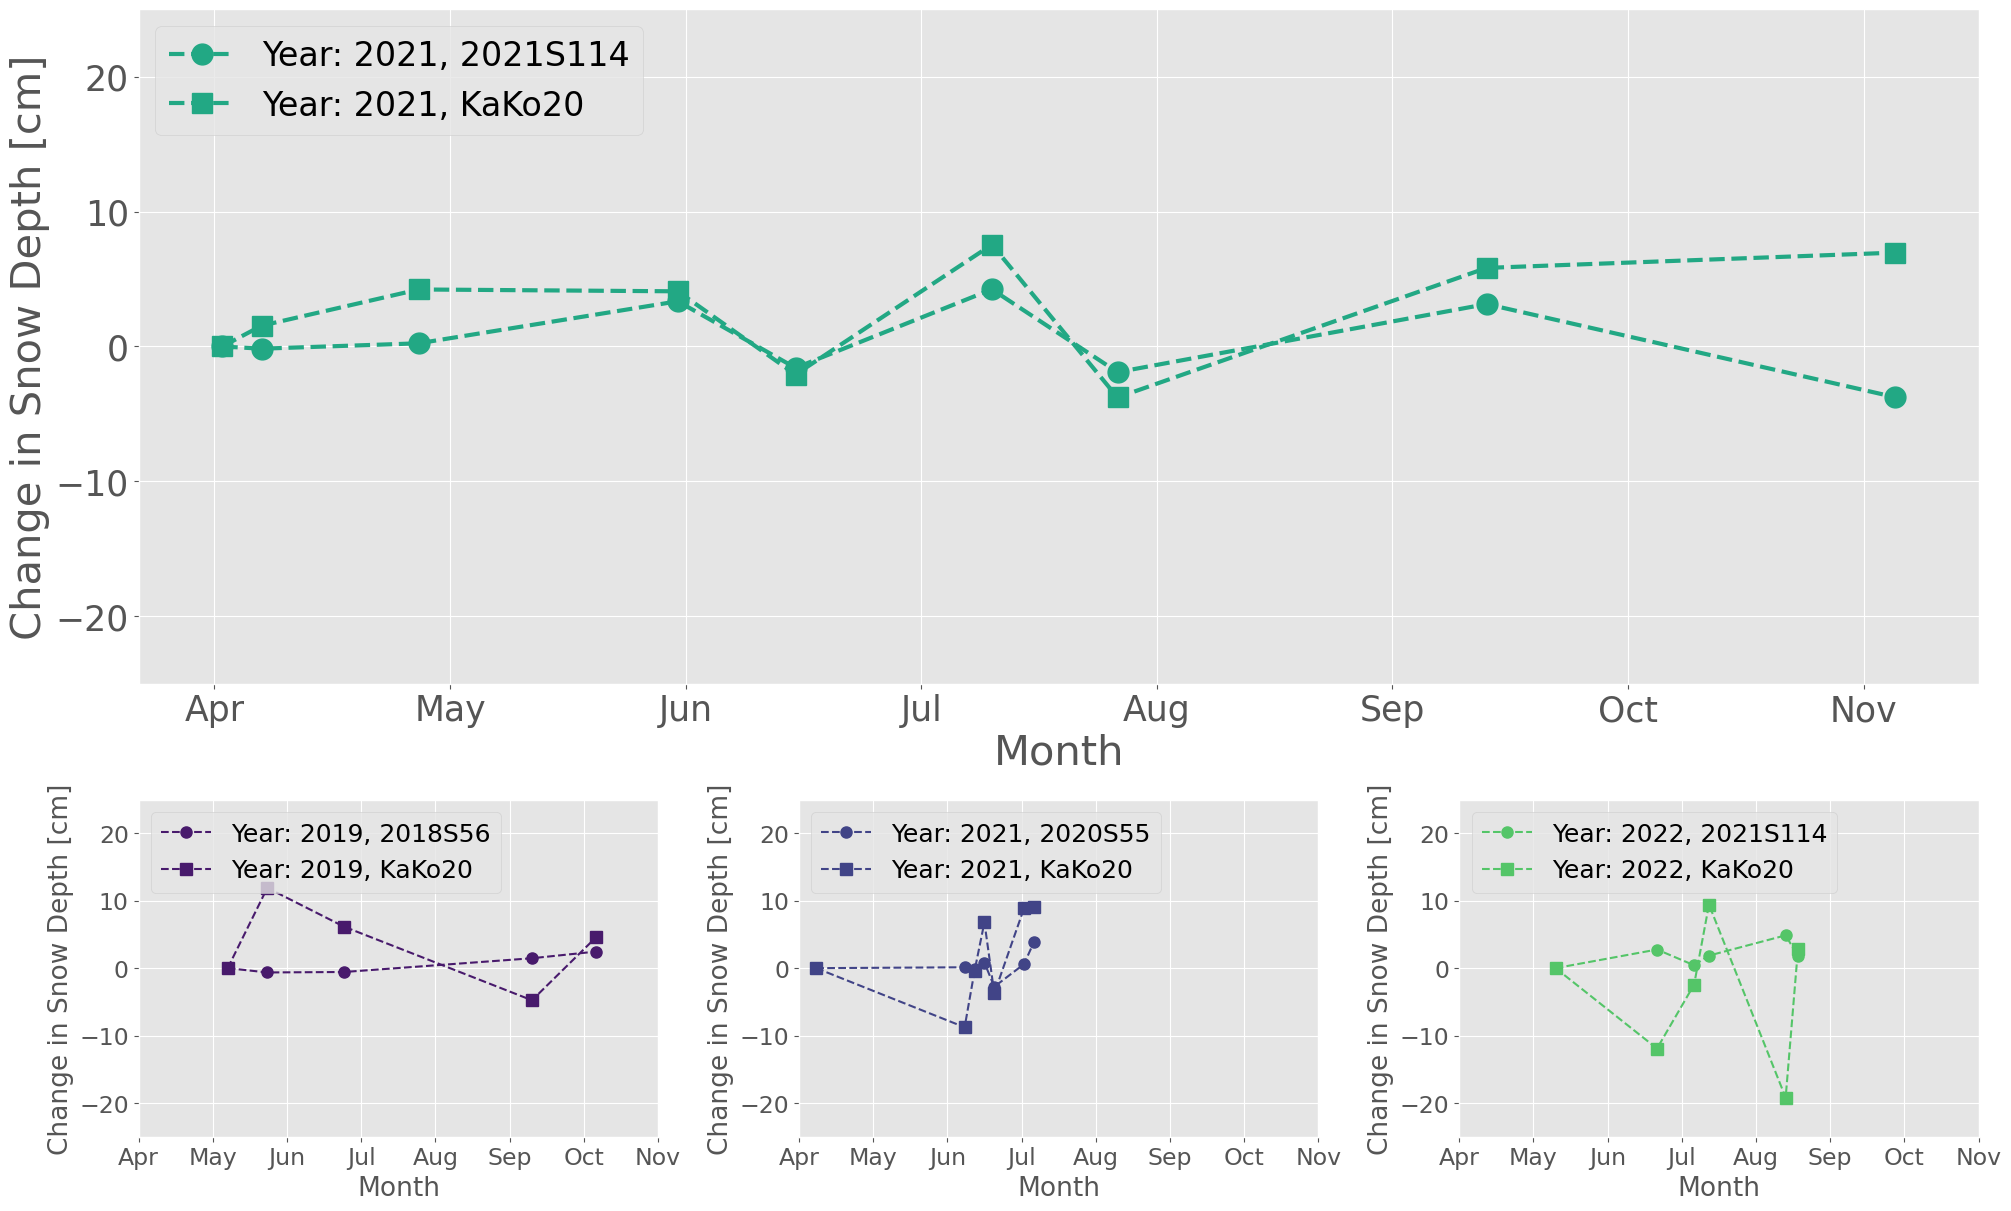

In [15]:
# Set the y-axis limits
y_limits = (-25, 25)

fig = plt.figure(constrained_layout=True, figsize=(20, 12))
spec = fig.add_gridspec(ncols=3, nrows=2, height_ratios=[2, 1])

# Define the 4 sensor-year combinations you want to plot
sensor_years_to_plot = ["2021S114_2021", "2018S56_2019", "2020S55_2021", "2021S114_2022"]

ax = fig.add_subplot(spec[0, :])  

# Filter the data for "2021S114_2021"
sensor_year_data = matches_all[matches_all["Sensor_Year"] == "2021S114_2021"]

# Check if the filtered data is not empty
if not sensor_year_data.empty:
    # Plot buoy data with circles
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["STG_Buoy"], marker="o", linestyle="--",
             label=f"Year: 2021, {sensor}", color=sensor_color_map["2021S114"], markersize=15, linewidth=3)
    
    # Plot satellite data with squares
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["STG_Sat"], marker="s", linestyle="--",
             label=f"Year: 2021, KaKo20", color=sensor_color_map["2021S114"], markersize=15, linewidth=3)

    ax.set_xticks([4 + i for i in range(8)])
    ax.set_xticklabels(["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])
    ax.set_ylim(y_limits)
    ax.tick_params(axis="x", labelsize=25)
    ax.tick_params(axis="y", labelsize=25)
    ax.grid(True)
    ax.legend(loc="upper left", fontsize=24)
    ax.set_xlabel("Month", fontsize=30)
    ax.set_ylabel("Change in Snow Depth [cm]", fontsize=30)
else:
    ax.text(0.5, 0.5, "No data for 2021S114_2021", ha="center", va="center", fontsize=14, color="red")

# Loop through the remaining 3 sensor-year combinations to plot on the second row
for i, sensor_year in enumerate(sensor_years_to_plot[1:]):
    # Create subplot axes for the second row
    ax = fig.add_subplot(spec[1, i])
    
    # Filter the data for the specific sensor-year combination
    sensor_year_data = matches_all[matches_all["Sensor_Year"] == sensor_year]
    
    # Check if the filtered data is not empty
    if sensor_year_data.empty:
        ax.text(0.5, 0.5, f"No data for {sensor_year}", ha="center", va="center", fontsize=14, color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue  # Skip plotting if no data is available

    # Extract the year and sensor information
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    # Determine the color based on the sensor number and special condition
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black") 

    # Plot buoy data with circles
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["STG_Buoy"], marker="o", linestyle="--", 
             label=f"Year: {year}, {sensor}", color=color, markersize=8, linewidth=1.5)
    
    # Plot satellite data with squares
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["STG_Sat"], marker="s", linestyle="--", 
             label=f"Year: {year}, KaKo20", color=color, markersize=8, linewidth=1.5)
    
    # Set x-axis labels to be the month names with approximate positions
    ax.set_xticks([4 + i for i in range(8)])
    ax.set_xticklabels(["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])
    ax.set_ylim(y_limits)
    

    ax.tick_params(axis="x", labelsize=17)
    ax.tick_params(axis="y", labelsize=17)
    ax.grid(True)
    ax.legend(loc="upper left", fontsize=18)
    ax.set_xlabel("Month", fontsize=19)
    ax.set_ylabel("Change in Snow Depth [cm]", fontsize=19)

plt.savefig("STG_highlighted_full_row.png", bbox_inches="tight")
plt.show()


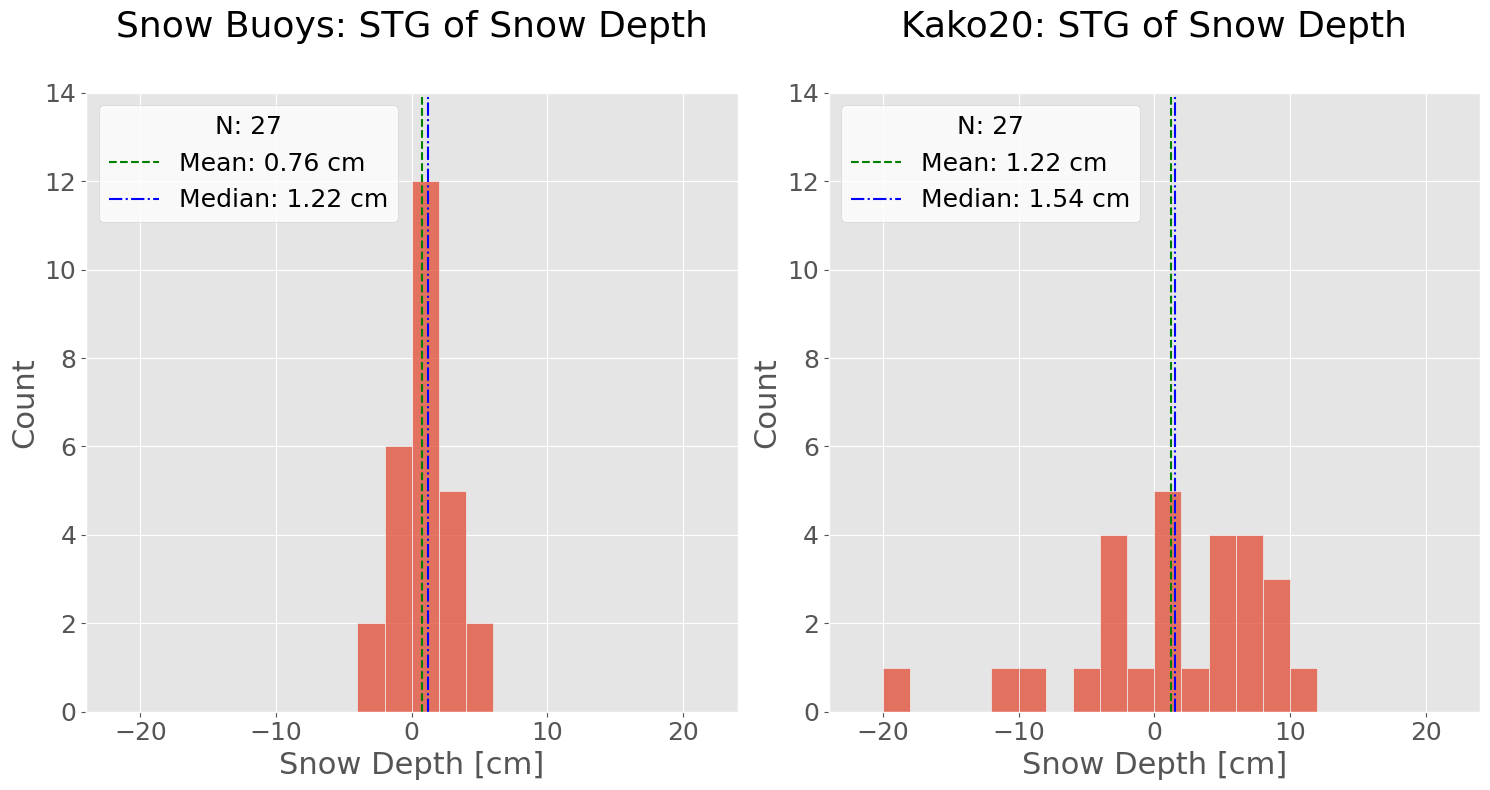

In [16]:
filtered_df = matches_all[matches_all["Sensor_Number"] != "2021S112"]
filtered_df = filtered_df.reset_index(drop=True)


STG_buoy = filtered_df["STG_Buoy"]
STG_satellite = filtered_df["STG_Sat"]


SampleMean_Buoy = np.nanmean(STG_buoy)
SampleMean_KaKo20 = np.nanmean(STG_satellite)

SampleMedian_Buoy = np.nanmedian(STG_buoy)
SampleMedian_KaKo20 = np.nanmedian(STG_satellite)

N_Buoy = len(STG_buoy)
N_KaKo20 = len(STG_satellite)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Define font size
title_fontsize = 26
label_fontsize = 22
linespacing = 1.5

# Set the axis limits
x_limits = (-24, 24)
y_limits = (0, 14)

# Define bin width and calculate the number of bins
bin_width = 2
bins = np.arange(x_limits[0], x_limits[1] + bin_width, bin_width)

sns.histplot(STG_buoy, kde=False, stat="count", bins=bins, ax=axs[0])
axs[0].set_title("Snow Buoys: STG of Snow Depth\n", fontsize=title_fontsize, linespacing=linespacing)
axs[0].axvline(SampleMean_Buoy, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_Buoy))
axs[0].axvline(SampleMean_KaKo20, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMean_KaKo20))
axs[0].set_xlabel("Snow Depth [cm]", fontsize=label_fontsize)
axs[0].set_ylabel("Count", fontsize=label_fontsize)
axs[0].set_xlim(x_limits)
axs[0].set_ylim(y_limits)
axs[0].tick_params(axis="x", labelsize=18)
axs[0].tick_params(axis="y", labelsize=18)
axs[0].legend(title=f"N: {N_Buoy}", title_fontsize=18, fontsize=18, facecolor="white")

sns.histplot(STG_satellite, kde=False, stat="count", bins=bins, ax=axs[1])
axs[1].set_title("Kako20: STG of Snow Depth\n", fontsize=title_fontsize, linespacing=linespacing)
axs[1].axvline(SampleMean_KaKo20, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_KaKo20))
axs[1].axvline(SampleMedian_KaKo20, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_KaKo20))
axs[1].set_xlabel("Snow Depth [cm]", fontsize=label_fontsize)
axs[1].set_ylabel("Count", fontsize=label_fontsize)
axs[1].set_xlim(x_limits)
axs[1].set_ylim(y_limits)
axs[1].tick_params(axis="x", labelsize=18)
axs[1].tick_params(axis="y", labelsize=18)
axs[1].legend(title=f"N: {N_KaKo20}", title_fontsize=18, fontsize=18, facecolor="white")

plt.tight_layout()

plt.savefig("Histogram_STG.png", dpi=300, bbox_inches="tight")

plt.show()
